## Lab 10.2

Don't forget to push your lab notebook to your repo once you entered a quiz.

### Activity 1
Name: `planet-snr`

Finish by end of the lab.

1. Load our processed image of the planets from the fits file `../Data/processed-planets.fits` using the code below.
2. Crop to just a box around the planet to the right of the star (right of centre of the image), around 20px x 20px
3. Calculate the signal to noise ratio (SNR) by finding the maximum of that cropped area (i.e. the planet, or signal) and dividing it by the standard deviation of the entire image /
2. Enter the SNR in the quiz under `planet-snr`. 

Populating the interactive namespace from numpy and matplotlib
SNR: 10.960614579927718


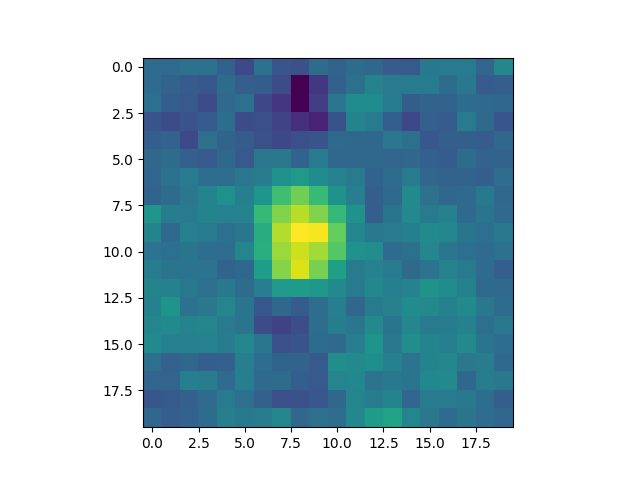

In [1]:
%pylab ipympl
import skimage.data
import skimage.io
import scipy.ndimage
import scipy.ndimage.filters
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits
planets = fits.open("../Data/processed-planets.fits")[0].data

# show and crop the image
left = 140
top = 90
right = 160
bottom = 110
plt.imshow(planets[top:bottom, left:right])

# calculate the signal to noise ratio
maxVal = np.max(planets[top:bottom, left:right])
stdev = np.std(planets)
SNR = maxVal/stdev
print(f"SNR: {SNR}")

### Activity 2
Name: `mystery-sigma`, `mystery-image`



1. Load the 2D image file from the png `lab10-2-image-mystery.png` using the code below.
2. Plot the data as an image. You will not be able to identify what it is.
3. Generate a histogram of the data with around 100 bins and a log scale on the y-axis.  You will need to reshape the image array as one long 1D array before you plot it. Calculate the standard deviation, sigma, round it to five decimal places (i.e. one sig-fig) and enter it on course spaces under the question `mystery-sigma`.
4. Figure out what is in the image by applying a median filter. This will reveal a hidden object. Adjust the size of the filter as needed until you see the image. You can also apply a Gaussian-blur filter to clean up the image. Type what you see into Brightspaces quiz under the question `mystery-image`.

Populating the interactive namespace from numpy and matplotlib


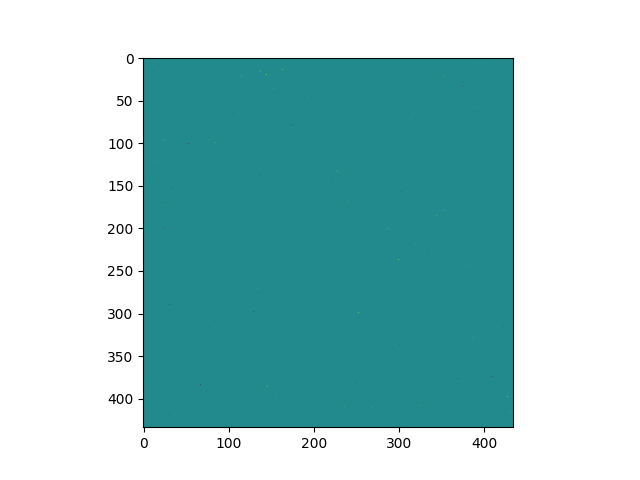

In [2]:
%pylab ipympl
import skimage.data
import skimage.io
import scipy.ndimage
import scipy.ndimage.filters
import matplotlib.pyplot as plt
import numpy as np

# This code will load a PNG image file as grayscale (only one channel).
mystery = skimage.io.imread('../Data/lab10-2-image-mystery.png', as_gray=True).astype('float32')

# plot the data as an image
plt.imshow(mystery)
plt.show()

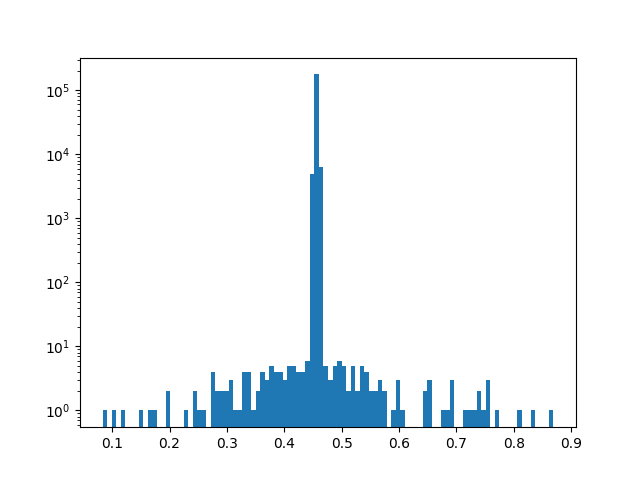

stdev: 0.004910633899271488


In [3]:
# generate histogram
fig = plt.figure()

res = mystery.reshape([1, len(mystery)*len(mystery[0])])
plt.hist(res[0], bins=100)
plt.yscale("log")
plt.show()
stdev = np.std(res[0])
print(f"stdev: {stdev}")

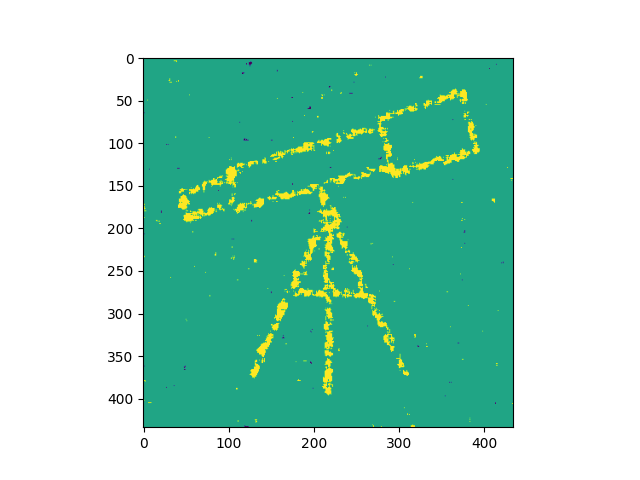

In [4]:
# median filter
fig = plt.figure()
newImg = scipy.ndimage.median_filter(mystery, 6)
plt.imshow(newImg)
plt.show()